In [3]:
pip install statsmodels

  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.7 MB 2.1 MB/s eta 0:00:05
   ----- ---------------------------------- 1.3/9.7 MB 3.2 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.7 MB 3.5 MB/s eta 0:00:03
   ----------- ---------------------------- 2.9/9.7 MB 3.6 MB/s eta 0:00:02
   --------------- ------------------------ 3.7/9.7 MB 3.6 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.7 MB 3.7 MB/s eta 0:00:02
   ---------------------- ----------------- 5.5/9.7 MB 3.8 MB/s eta 0:00:02
   --------------------------- ------------ 6.6/9.7 MB 3.9 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.7 MB 3.9 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.7 MB 3.9 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.7 MB 3.8 MB/s eta 0:00:01
   --------------------------


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Simulated dataset
data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 7, 8],
    'Test_Score': [50, 55, 65, 70, 75, 80, 90, 93, 96]
}

df = pd.DataFrame(data)

# Add a constant (intercept term)
X = sm.add_constant(df['Hours_Studied'])  # independent variable
y = df['Test_Score']  # dependent variable

# Fit the model
model = sm.OLS(y, X).fit()

# Print the regression results
# print(model.summary())


# Print selected metrics
print("Regression Summary:")
print(f"Intercept (beta0): {model.params['const']:.2f}")
print(f"Slope (beta1): {model.params['Hours_Studied']:.2f}")
print(f"R-squared: {model.rsquared:.3f}")
print(f"p-value for beta1: {model.pvalues['Hours_Studied']:.4f}")
print(f"t-value for beta1: {model.tvalues['Hours_Studied']:.3f}")


# Confidence intervals
ci = model.conf_int(alpha=0.05)
print("\n95% Confidence Intervals:")
print(f"Intercept (beta0): [{ci.loc['const', 0]:.2f}, {ci.loc['const', 1]:.2f}]")
print(f"Slope (beta1): [{ci.loc['Hours_Studied', 0]:.2f}, {ci.loc['Hours_Studied', 1]:.2f}]")

Regression Summary:
Intercept (beta0): 42.86
Slope (beta1): 6.70
R-squared: 0.987
p-value for beta1: 0.0000
t-value for beta1: 23.099

95% Confidence Intervals:
Intercept (β₀): [39.22, 46.50]
Slope (β₁): [6.02, 7.39]


We'll plot:
- The regression line
- A 95% confidence band for the predicted mean response
- (Optionally) a prediction band, which is wider, showing uncertainty for individual predictions

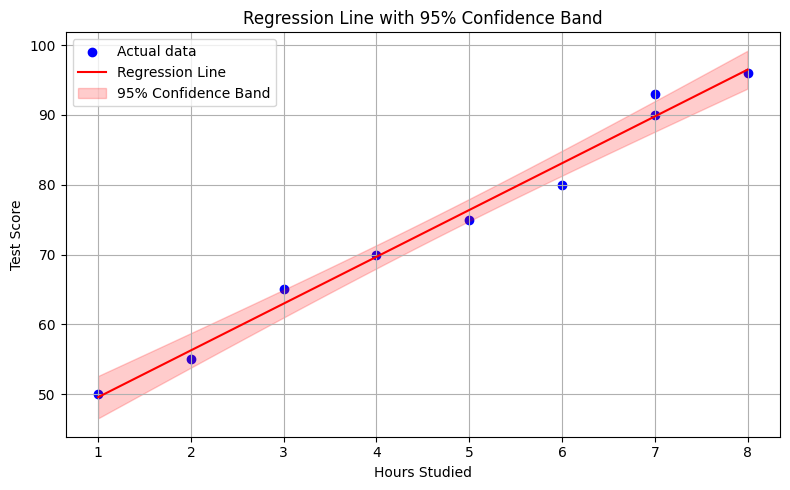

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create new X values for smoother line and confidence band
x_pred = np.linspace(df['Hours_Studied'].min(), df['Hours_Studied'].max(), 100)
X_pred = sm.add_constant(x_pred)

# Get predictions with confidence intervals
predictions = model.get_prediction(X_pred)
pred_summary = predictions.summary_frame(alpha=0.05)  # 95% CI

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(df['Hours_Studied'], df['Test_Score'], color='blue', label='Actual data')
plt.plot(x_pred, pred_summary['mean'], color='red', label='Regression Line')
plt.fill_between(x_pred, pred_summary['mean_ci_lower'], pred_summary['mean_ci_upper'],
                 color='red', alpha=0.2, label='95% Confidence Band')

plt.xlabel('Hours Studied')
plt.ylabel('Test Score')
plt.title('Regression Line with 95% Confidence Band')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()